In [4]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt 
# Import datasets, classifiers and performance metrics
from sklearn import datasets
%matplotlib inline

### Objective:Handwritten digit recognition using SVM 

In [66]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score ,classification_report,roc_curve,auc
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from  sklearn.preprocessing import scale

In [ ]:
# There are multiple ways to download MNIST dataset 
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original', data_home='custom_data_home')
# print(mnist.data.shape)
# print (mnist.target.shape)

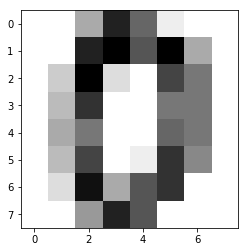

In [29]:
# The digits dataset
digits = datasets.load_digits()
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
image = images_and_labels[0][0]
plt.imshow(images_and_labels[0][0],cmap=plt.cm.gray_r)

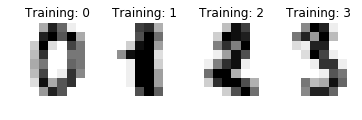

In [31]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [39]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)

(1797, 64)

In [65]:
X = []
Y = []
for index,(image, label) in enumerate(images_and_labels):
    X.append(image)
    Y.append(label)
X = np.asarray(X)
Y = np.asarray(Y)
classes = list(set(Y))
print (classes)
print(X.shape)
print(Y.shape)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(1797, 8, 8)
(1797,)


In [40]:
X = X.reshape(n_samples, -1)
print (X.shape)

(1797, 64)

In [43]:
# Pre-processing or scaling the image
X = scale(X)
print(X)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [46]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size= 0.70,random_state=101)

print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(1257, 64)
(1257,)
(540, 64)
(540,)


## Model Building

In [47]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
predictions = svm_linear.predict(x_test)
predictions[:10]

array([7, 4, 7, 9, 1, 7, 5, 7, 1, 0])

In [53]:
confusion  = confusion_matrix(y_true=y_test,y_pred=predictions)
confusion

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0, 58,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  1,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 47]])

In [55]:
accuracy_score(y_true=y_test,y_pred=predictions)

0.9777777777777777

In [59]:
class_wise = classification_report(y_true=y_test,y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       0.98      1.00      0.99        54
           4       0.97      0.97      0.97        61
           5       0.98      0.98      0.98        59
           6       1.00      0.98      0.99        46
           7       1.00      0.96      0.98        56
           8       0.93      0.93      0.93        59
           9       0.98      0.98      0.98        48

   micro avg       0.98      0.98      0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [60]:
import gc 
gc.collect()

7628

## Non Linear SVM

In [86]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)

/media/samartht/disk1/env/anaconda3/envs/py3dev/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [90]:
predictions_rbf = svm_rbf.predict(x_test)
print (accuracy_score(y_true=y_test,y_pred=predictions_rbf))
print (classification_report(y_true=y_test,y_pred=predictions_rbf))

0.9851851851851852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.98      0.97        55
           2       0.98      1.00      0.99        49
           3       0.98      0.98      0.98        54
           4       0.97      0.97      0.97        61
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        56
           8       0.96      0.93      0.95        59
           9       1.00      1.00      1.00        48

   micro avg       0.99      0.99      0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



### Grid Search Cross -validation 

In [91]:
parameters = {'C':[1,10,100],'gamma':[1e-2,1e-3,1e-4]}
svc_grid_search = SVC(kernel='rbf')
clf = GridSearchCV(svc_grid_search,param_grid=parameters,scoring='accuracy')
clf.fit(x_train,y_train)

/media/samartht/disk1/env/anaconda3/envs/py3dev/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [109]:
cv_results= pd.DataFrame(clf.cv_results_)
cv_results

/media/samartht/disk1/env/anaconda3/envs/py3dev/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/media/samartht/disk1/env/anaconda3/envs/py3dev/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/media/samartht/disk1/env/anaconda3/envs/py3dev/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.038629,0.000568,0.019170,0.000507,1,0.01,"{'C': 1, 'gamma': 0.01}",0.964371,0.978520,0.956835,0.966587,0.008981,6,0.991627,0.994033,0.992857,0.992839,0.000983
1,0.059933,0.000435,0.027184,0.000060,1,0.001,"{'C': 1, 'gamma': 0.001}",0.933492,0.930788,0.925659,0.929992,0.003247,7,0.941388,0.939141,0.945238,0.941922,0.002518
2,0.112133,0.000671,0.030424,0.000255,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.225653,0.224344,0.270983,0.240255,0.021657,9,0.251196,0.233890,0.276190,0.253759,0.017364
3,0.032616,0.000595,0.016746,0.000314,10,0.01,"{'C': 10, 'gamma': 0.01}",0.959620,0.983294,0.966427,0.969769,0.009959,2,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.026371,0.000478,0.016527,0.000614,10,0.001,"{'C': 10, 'gamma': 0.001}",0.969121,0.978520,0.961631,0.969769,0.006902,2,0.989234,0.986874,0.990476,0.988861,0.001494
5,0.057473,0.000317,0.026988,0.000497,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.928741,0.930788,0.923261,0.927605,0.003173,8,0.936603,0.940334,0.945238,0.940725,0.003536
6,0.032687,0.000561,0.016778,0.000275,100,0.01,"{'C': 100, 'gamma': 0.01}",0.959620,0.983294,0.966427,0.969769,0.009959,2,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.022201,0.000657,0.013178,0.000376,100,0.001,"{'C': 100, 'gamma': 0.001}",0.964371,0.985680,0.971223,0.973747,0.008890,1,0.998804,1.000000,1.000000,0.999601,0.000564
8,0.025601,0.000429,0.016763,0.000932,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.966746,0.976134,0.964029,0.968974,0.005183,5,0.988038,0.985680,0.990476,0.988065,0.001958


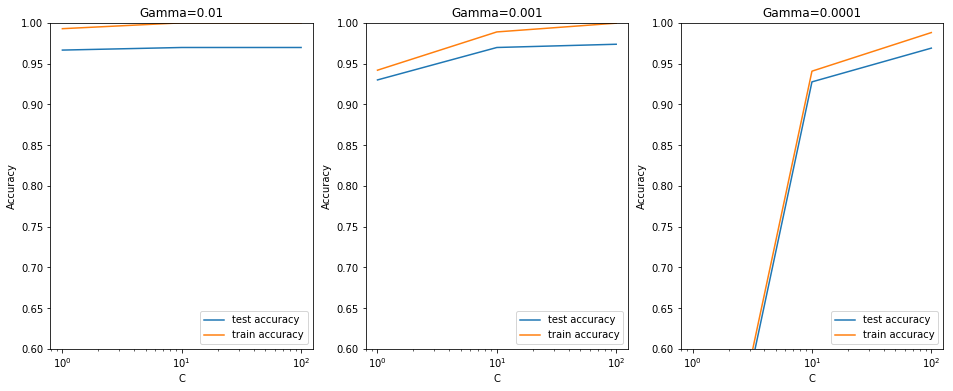

In [113]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

In [130]:
# since 2 nd value of gamma = 0.001 looks promising as training and test acc are comparable 
c = 1
gamma = 0.001 

svm_final = SVC(kernel='rbf',C=1,gamma=0.001)
svm_final.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [131]:
predictions_final = svm_final.predict(x_test)
pred_df = pd.DataFrame({'GT':y_test,'Pred':predictions_final})
pred_df.head()

,GT,Pred
0,7,7
1,4,4
2,7,7
3,9,7
4,1,1


In [132]:
confusion_matrix(y_pred=predictions_final,y_true=y_test)


array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  2,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 45,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 59,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  1, 56,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0, 52,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  2,  1, 44]])

In [133]:
accuracy_score(y_true=y_test,y_pred=predictions_final)

0.95

In [135]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

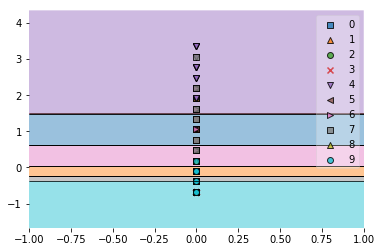

In [160]:
## Plotting SVM using mlxtend , but we have to retrain the data on 2 features only hence selected col 32 and 33 
## and plotted decision regions. 
svm_mlx = SVC(kernel='linear',C=1,gamma=0.001)
svm_mlx.fit(x_train[:,32:34],y_train)

plot_decision_regions(X=x_test[:,32:34], 
                      y=y_test,
                      clf=svm_mlx, 
                      )
